In [244]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [245]:
# New Antecedent/Consequent objects hold universe variables and membership
# functions
air_quality = ctrl.Antecedent(np.arange(0, 11, 1), 'air_quality')
pop_dens = ctrl.Antecedent(np.arange(0, 11, 1), 'population_density')
action_needed = ctrl.Consequent(np.arange(0, 101, 1), 'action_needed')

# Auto-membership function population is possible with .automf(3, 5, or 7)
air_quality['poor'] = fuzz.gbellmf(air_quality.universe, a=2.5, b=3, c=0)
air_quality['average'] = fuzz.gbellmf(air_quality.universe, a=1.5, b=3, c=5)
air_quality['good'] = fuzz.gbellmf(air_quality.universe, a=2.5, b=3, c=10)
# pop_dens.automf(3, variable_type='quantity')
pop_dens['low'] = fuzz.gbellmf(pop_dens.universe, a=2.5, b=3, c=0)
pop_dens['average'] = fuzz.gbellmf(pop_dens.universe, a=2, b=3, c=5)
pop_dens['high'] = fuzz.gbellmf(pop_dens.universe, a=2.5, b=3, c=10)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
action_needed['low'] = fuzz.gbellmf(action_needed.universe, a=25, b=3, c=0)
action_needed['medium'] = fuzz.gbellmf(action_needed.universe, a=15, b=3, c=50)
action_needed['high'] = fuzz.gbellmf(action_needed.universe, a=25, b=3, c=100)

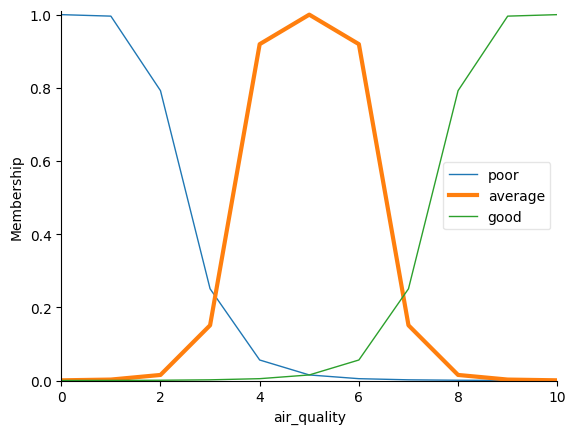

In [246]:
air_quality['average'].view()

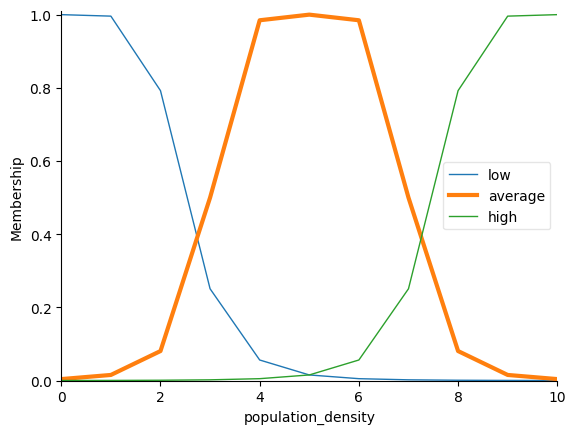

In [247]:
pop_dens['average'].view()

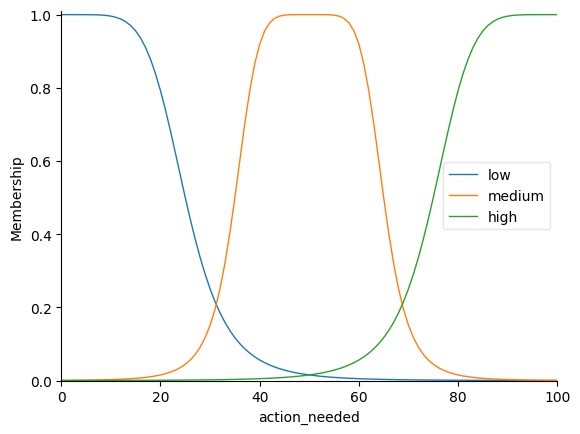

In [248]:
action_needed.view()

In [249]:
rule1 = ctrl.Rule(air_quality['good'], action_needed['low'])
rule2 = ctrl.Rule(air_quality['average'] & pop_dens['low'], action_needed['low'])
rule3 = ctrl.Rule(air_quality['average'] & pop_dens['average'], action_needed['medium'])
rule4 = ctrl.Rule(air_quality['average'] & pop_dens['high'], action_needed['high'])
rule5 = ctrl.Rule(air_quality['poor'] & pop_dens['low'], action_needed['medium'])
rule6 = ctrl.Rule(air_quality['poor'] & (pop_dens['average'] | pop_dens['high']), action_needed['high'])

In [250]:
ctrl_sys = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
simulation = ctrl.ControlSystemSimulation(ctrl_sys)

simulation.output['action_needed']=44.09942723246248


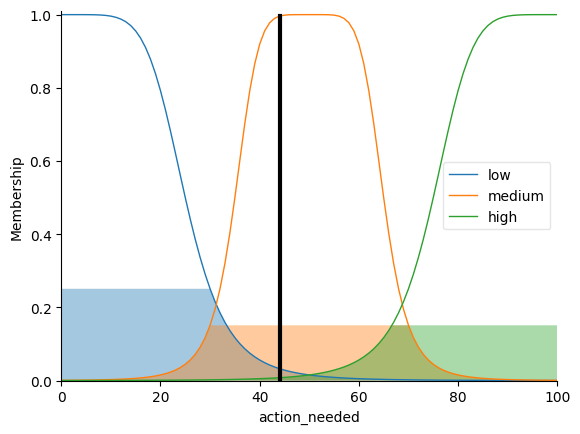

In [287]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
example_case = {
    'air_quality': 7,
    'population_density':7
}

simulation.inputs(example_case)
simulation.compute()

# Once computed, we can view the result as well as visualize it.
print(f"{simulation.output['action_needed']=}")
action_needed.view(sim=simulation)
